In [1]:
# Let's start with importing our packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.family'] = "serif"

In [2]:
# run this cell many times, as if you are rolling a die
print(np.random.randint(low=1, high=6+1)) # notice that `high` is one plus the highest number of our random variable. This trick is common in python.

2


In [3]:
N_roll = 100
outcomes = []
for i in range(N_roll): # do the following operation for 100 times
    outcomes.append(np.random.randint(low=1, high=6+1))
outcomes = np.array(outcomes)

In [4]:
print(outcomes)

[1 1 5 2 1 2 6 4 4 1 6 1 4 5 3 4 1 1 3 1 4 4 6 3 4 2 4 5 2 2 6 6 4 3 6 2 3
 5 5 3 6 6 3 3 1 4 3 6 6 1 1 5 1 2 6 2 6 1 6 3 4 4 6 6 6 6 1 1 3 5 3 2 6 2
 1 2 5 4 6 2 6 2 2 3 2 4 2 3 4 2 1 1 3 6 3 4 5 5 5 4]


In [5]:
np.sum(outcomes == 1) # this shows the frequency of "1" in the 100 rolls

18

In [6]:
np.sum(outcomes == 4) # this shows the frequency of "4" in the 100 rolls

17

In [7]:
# Let's use the for loop again
for i in range(1, 6+1):
    print(f'The frequency of {i} is', np.sum(outcomes == i))

The frequency of 1 is 18
The frequency of 2 is 17
The frequency of 3 is 16
The frequency of 4 is 17
The frequency of 5 is 11
The frequency of 6 is 21


In [8]:
values, counts = np.unique(outcomes, return_counts=True)
print(values, counts)
print(list(zip(values, counts)))

[1 2 3 4 5 6] [18 17 16 17 11 21]
[(1, 18), (2, 17), (3, 16), (4, 17), (5, 11), (6, 21)]


Text(0.5, 1.0, 'Number of rolls: 100')

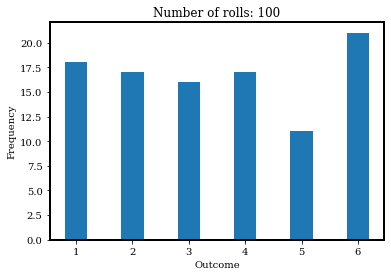

In [9]:
plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Number of rolls: {N_roll}')

[1 2 3 4 5 6] [1660 1738 1650 1604 1719 1629]


Text(0.5, 1.0, 'Number of rolls: 10000')

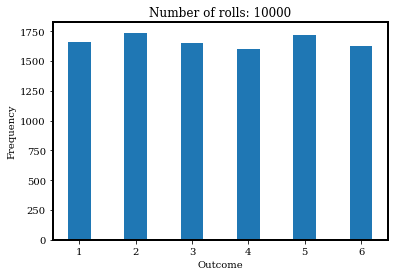

In [10]:
N_roll = 10000

outcomes = []
for i in range(N_roll): # do the following operation for 100 times
    outcomes.append(np.random.randint(low=1, high=6+1))
outcomes = np.array(outcomes)

values, counts = np.unique(outcomes, return_counts=True)
print(values, counts)

plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Number of rolls: {N_roll}')

In [11]:
chances = counts / N_roll
print(chances)

[0.166  0.1738 0.165  0.1604 0.1719 0.1629]


Text(0.5, 1.0, 'Number of rolls: 10000')

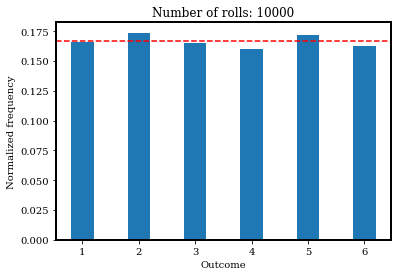

In [12]:
plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4, density=True)
plt.axhline(1/6, c='r', ls='--')
plt.xlabel('Outcome')
plt.ylabel('Normalized frequency')
plt.title(f'Number of rolls: {N_roll}')

In [13]:
# sample from a uniform distribution U(0, 1)
n_sample = 200 # sample size
data = np.random.uniform(0, 1, size=(n_sample,))

In [14]:
# Take a look at the data
print(data[:10])

[0.90906748 0.10182075 0.41095865 0.98173699 0.97593535 0.92760588
 0.68835662 0.67339875 0.4632625  0.99215839]


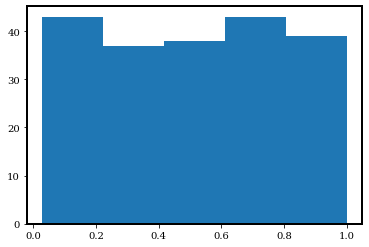

In [15]:
plt.hist(data, bins=5); # indeed, it looks like a uniform distribution

In [16]:
np.mean(data), np.median(data), np.std(data)

(0.5096615724744971, 0.5255724080674171, 0.28784035180044365)

In [17]:
np.sqrt(np.sum((data - np.mean(data))**2 / len(data)))
# Okay, `np.std` does its job pretty well.

0.2878403518004436

In [18]:
data = np.concatenate([data, [100]])

In [19]:
np.mean(data), np.median(data), np.std(data)

(1.0046383805716388, 0.5264774318156735, 7.005915213559728)

In [20]:
n_sample = 10000 # sample size
mu, sigma = 0, 1 # standard normal distribution
data = np.random.normal(loc=mu, scale=sigma, size=(n_sample))

In [21]:
data.shape

(10000,)

In [22]:
np.mean(data), np.median(data), np.std(data)
# Indeed, the mean and median of this data is very close to 0. The standard deviation is very close to 1. 

(0.015461491011688477, 0.026042596046194952, 0.9945490242839535)

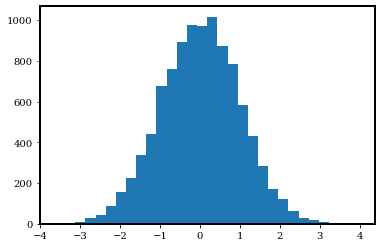

In [23]:
# Let's visualize it
plt.hist(data, bins=30);

In [24]:
np.sum(np.abs(data) > 3)

21

In [25]:
fraction = np.sum(np.abs(data) > 3) / len(data)
print(f'Only {fraction * 100}% of the data points are outside of [-3, 3].')

Only 0.21% of the data points are outside of [-3, 3].


In [26]:
# Assume the average number of photon from a star is 10 during a 900s exposure
photon_rate = 4
# We "observe" this star for 500 times. Each time we can count how many photons we get, denoted by $x$. 
# This is equivalent to sampling from a Poisson distribution with $\lambda = 4$
n_exposure = 1000
photon_counts = np.random.poisson(photon_rate, size=(n_exposure,))

In [27]:
photon_counts[:30]

array([3, 6, 6, 7, 9, 7, 3, 2, 2, 2, 3, 5, 4, 2, 5, 6, 6, 4, 5, 2, 2, 6,
       2, 1, 4, 6, 5, 5, 7, 4])

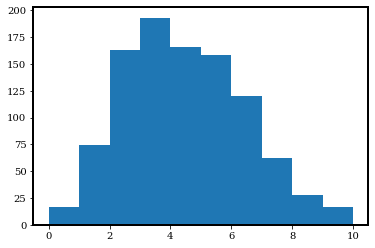

In [28]:
plt.hist(photon_counts, range=(0, 10));

In [29]:
np.mean(photon_counts), np.median(photon_counts), np.var(photon_counts)

(3.994, 4.0, 4.045964000000001)

In [30]:
photon_rate = 2000
n_exposure = 10000
photon_counts = np.random.poisson(photon_rate, size=(n_exposure,))

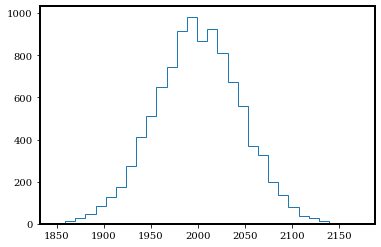

In [31]:
plt.hist(photon_counts, bins=30, histtype='step');

In [32]:
np.mean(photon_counts), np.median(photon_counts), np.var(photon_counts)

(1999.829, 2000.0, 2073.468159)

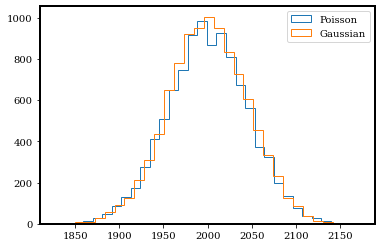

In [33]:
gaussian_data = np.random.normal(photon_rate, np.sqrt(photon_rate), size=(n_exposure,))
plt.hist(photon_counts, bins=30, histtype='step', label='Poisson');
plt.hist(gaussian_data, bins=30, histtype='step', label='Gaussian');
plt.legend()

In [34]:
plt.rcParams['figure.figsize'] = (8, 8)

In [35]:
# Let's define an image size, e.g., 200 x 200
img_size = 200
photon_rate = 4
img = np.random.poisson(photon_rate, size=(img_size, img_size))

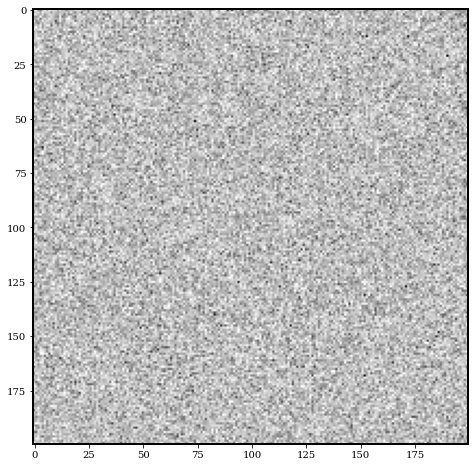

In [36]:
plt.imshow(img, cmap='binary');

In [37]:
np.mean(img), np.var(img) # nice Poisson distribution

(4.00365, 4.0192366774999995)

In [38]:
# This calculate the mean for each column of the noisy image
np.mean(img, axis=0)

array([3.995, 3.94 , 3.965, 4.03 , 4.   , 4.16 , 4.275, 4.16 , 3.895,
       4.01 , 4.025, 3.99 , 3.94 , 3.87 , 3.965, 3.69 , 3.975, 4.125,
       4.03 , 4.115, 3.785, 3.895, 4.11 , 3.98 , 3.85 , 4.045, 4.25 ,
       4.17 , 4.21 , 3.725, 3.89 , 3.97 , 3.98 , 3.795, 3.835, 3.965,
       3.905, 4.085, 4.01 , 4.095, 4.11 , 4.155, 4.055, 3.905, 3.925,
       4.01 , 3.94 , 4.135, 3.72 , 4.14 , 4.215, 4.025, 4.045, 4.11 ,
       4.31 , 3.945, 4.02 , 4.05 , 4.235, 3.805, 4.005, 3.95 , 3.935,
       3.99 , 4.025, 4.14 , 4.315, 4.04 , 4.055, 4.055, 4.14 , 3.89 ,
       4.055, 4.17 , 4.035, 4.08 , 3.87 , 3.735, 4.175, 3.795, 4.   ,
       3.81 , 3.96 , 3.905, 4.06 , 3.935, 4.135, 3.79 , 3.76 , 3.99 ,
       3.8  , 3.88 , 4.05 , 4.075, 3.97 , 3.84 , 3.91 , 4.175, 3.92 ,
       4.305, 4.165, 3.96 , 3.88 , 4.065, 4.045, 4.115, 4.275, 3.88 ,
       4.065, 3.875, 4.1  , 3.645, 4.075, 4.2  , 3.99 , 3.77 , 4.295,
       4.125, 4.06 , 4.12 , 4.065, 3.99 , 4.135, 3.78 , 3.79 , 4.055,
       3.995, 3.71 ,

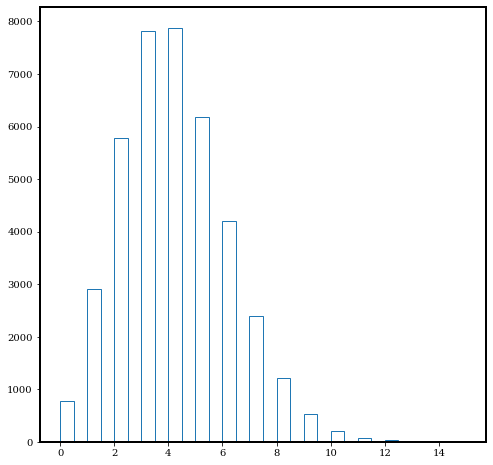

In [39]:
# We can also plot the histogram for the pixel values.
# You need to "flatten" the 2-D image to a 1-D array
plt.hist(img.flatten(), bins=30, histtype='step'); # looks like Poisson

In [40]:
SNR = np.mean(img) / np.std(img)
print(SNR)

1.9970287348800295


In [41]:
img_size = 200
photon_rate = 4
img_list = []
for i in range(16):
    img = np.random.poisson(photon_rate, size=(img_size, img_size))
    img_list.append(img)
    
img_list = np.array(img_list)

In [42]:
img_list.shape

(16, 200, 200)

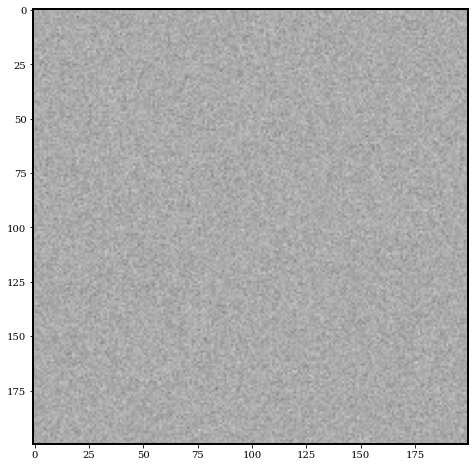

In [43]:
img_avg = np.mean(img_list, axis=0)
plt.imshow(img_avg, cmap='binary', vmin=0, vmax=12);

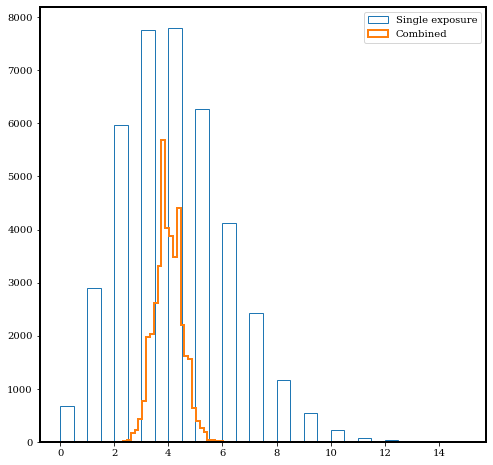

In [44]:
plt.hist(img.flatten(), bins=30, histtype='step', label='Single exposure');
plt.hist(img_avg.flatten(), bins=30, histtype='step', lw=2, label='Combined');
plt.legend();

In [45]:
SNR_avg = np.mean(img_avg) / np.std(img_avg)
print(SNR_avg)

8.021766648676534
